# Часть A

## MSE и константа

### Задание

Есть 100 значений некоторой абстрактной переменной, по которым была обучена модель. Затем была посчитана среднеквадратическая ошибка (MSE). Для 80 случаев разница истинного и предсказанного значения составляет 0,5, а для остальных 20 случаев равняется -0,3. Вы знаете, что модель была обучена неверно. Если добавить к ответам модели некоторую константу C, то результат улучшится. Существует ли такая константа? Если да, найдите её.

### Решение

$MSE = \frac{0.5^2 80 + (-0.3)^2 20}{100}$

$MSE_{new} = \frac{(0.5 + c)^2 80 + (-0.3 + c)^2 20}{100} = c^2 + 0.68 c + 0.218$

$MSE_{new}' = 2c + 0.68$

$MSE_{new}' = 0$ при $c = -0.34$

Без добавления константы $MSE = 0.218$, а с добавлением $MSE_{new} = 0.1024$

## Градиентный бустинг и случайный лес

### Задание

Существует некий временной ряд, область допустимых значений которого \[0; +∞). Допустим, это количество шагов. Предположим, вы используете два алгоритма машинного обучения для построения модели, предсказывающей количество шагов в определённый день, — градиентный бустинг и случайный лес. Какой из данных алгоритмов может возвращать отрицательные значения в качестве прогнозируемых и почему?

### Решение

Случайны лес не может возвращать отрицательные значения, так как каждое его дерево, по сути, запоминает выборку и и возвращает значения из нее же. Если в выборке нет отрицательных значений, то такое значение возвращено быть не может. Соответственно при взвешенном голосовании случайного леса тоже не будет отрицательных значений.

Градиентный бустинг же работает с весами и в теории, может выдать отрицательное значение, если на вход алгоритму подать данные, отличающиеся от обучаемой выборки.

## R squared

### Задание

Предположим, мы обучили линейную модель. Анализируя остатки модели, мы обнаружили значительную гетероскедастичность. Ваш коллега предложил использовать стандартные ошибки в форме Уайта, чтобы добиться лучшего качества модели. Снова обучили модель, однако R-квадрат остался тем же. Предложите объяснение этого явления. Приведите необходимые выкладки.

### Решение

При применении робастных стандартных ошибок пересчитываются коэффициенты при независимых переменных. Раньше коэффициэнты хоть и давали гетероскедастичность, но были значимыми. При пересчете они могли стать незначимыми, поэтому $R^2$ остался тем же.

## Стандартное отклонение

### Задание

С помощью некоторого датчика мы наблюдаем за температурой в холодильном отделении. Система должна поддерживать околонулевое значение. При поступлении нового измерения с датчика мы должны отдавать в stdout значение стандартного отклонения, рассчитанного по всей истории наблюдений. Более формально:

```python
stream = Stream(port=port, host=host)
while  stream.has_next():
    value = stream.next_value()
    # std calculation TBD
    print(std_value)
```

stream – это поток измерений с датчика, у него есть два метода:
• has_next() — проверяет, есть ли следующее значение, возвращает bool,
• next_value() — возвращает поступившее измерение, float.

Напишите код, вычисляющий стандартное отклонение при условии, что он должен работать на машине с оперативной памятью, не превышающей 100 МБ (из которых больше половины уже занято Python’ом :))

### Решение

```python
s1 = 0
s2 = 0
n = 0

stream = Stream(port=port, host=host)
while  stream.has_next():
    value = stream.next_value()
    
    # std calculation TBD
    s1 += value
    s2 += value ** 2
    n += 1
    std_value = (n * s2 - s1 ** 2) ** 0.5 / n
    print(std_value)
```


## sql

### Задание

Некоторая система выполняет задачи и записывает результат выполнения в таблицу следующего вида:

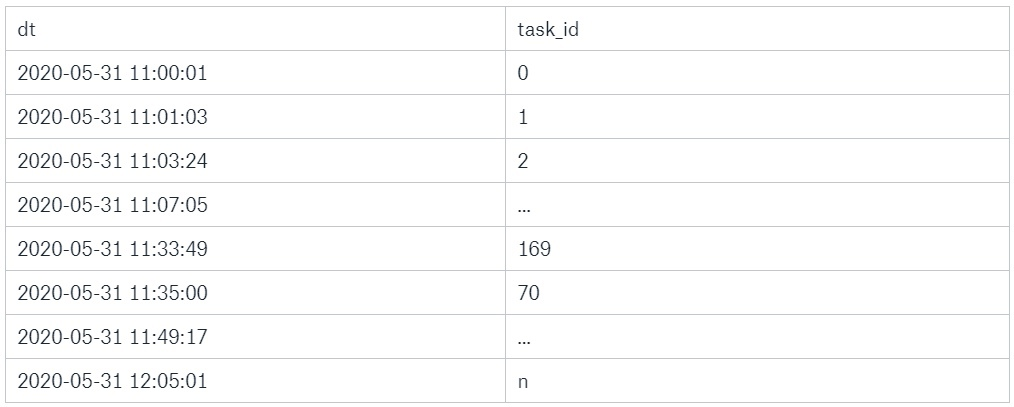

Если задача не была выполнена (упала), то соответствующий ей task_id не записывается в таблицу, а увеличивается на число, равное количеству изначально запланированных задач. После этого система снова пытается выполнить задачу и записать результат в таблицу. Количество попыток ограничено. Если в итоге задача не будет выполнена, то весь процесс выполнения задач приостанавливается.

Предположим, мы запланировали запись 100 задач. Если в процессе работы задача № 67 упадет (task_id = 67), то запись не произойдёт, а её номер увеличится на 100. Затем задача перезапустится с новым номером — 167. Если же и она упадёт, то произойдёт ещё одно увеличение переменной task_id на 100, и т. д.

Ваша задача состоит в том, чтобы написать SQL-запрос к таблице выше, который вернёт изначальные task_id всех задач, что не смогли завершиться с первой попытки.

### Решение


```sql
SELECT task_id % (SELECT COUNT(task_id) FROM test)
from test
WHERE task_id > (SELECT COUNT(task_id) FROM test)
```

# Часть B

In [1]:
import time
from concurrent.futures import ThreadPoolExecutor
import threading

In [2]:
# counter.py
        
class Counter:
    def __init__(self):
        self.value = 0
        self.thread_lock = threading.Lock() # добавлено
        
    def update(self, new_value):
        with self.thread_lock:          # добавлено
            local = self.value
            local += new_value
            time.sleep(0.1)
            self.value = local

In [3]:
# task.py

class Task:
    def __init__(self, value):
        self.status = 'ready'
        self.value = value
        
    def execute(self):
        new_value = self.value**2
        self.value = new_value
        return self.value

In [4]:
# main.py

new_counter = Counter()
values = [2]*10
tasks = []

def execute_and_count(task, counter):   # добавлено
    value = task.execute()              # добавлено
    counter.update(value)               # добавлено

for value in values:
    tasks.append(Task(value))
    
with ThreadPoolExecutor(max_workers=2) as executor:
    for task in tasks:
        # executor.submit(new_counter.update, task.execute())  -  удалено
        executor.submit(execute_and_count, task, new_counter)  # добавлено
        
print(new_counter.value)

40


# Часть C

## Подготовка

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('default')

In [6]:
# Читаем и чистим датасет
df = pd.read_csv('dataset.csv')
df.drop(['hashed_user_id'], axis=1, inplace=True)
df['user_sex'].replace('unknown', np.nan, inplace=True)
df['user_age'].replace(0, np.nan, inplace=True)

In [7]:
nan_count = pd.DataFrame(df.isna().sum()[df.isna().sum() > 0], columns=['NaN_count'])
nan_count['NaN_percentage %'] = np.around(nan_count['NaN_count'] / len(df) * 100, decimals=1)
print('Пропуски в данных')
nan_count

Пропуски в данных


,NaN_count,NaN_percentage %
user_age,3870,3.1
user_sex,77,0.1
device_brand,18844,15.0
device_model,19145,15.2


## Анализ

### Демография

Text(0.5, 1.0, 'Распределение по половому признаку')

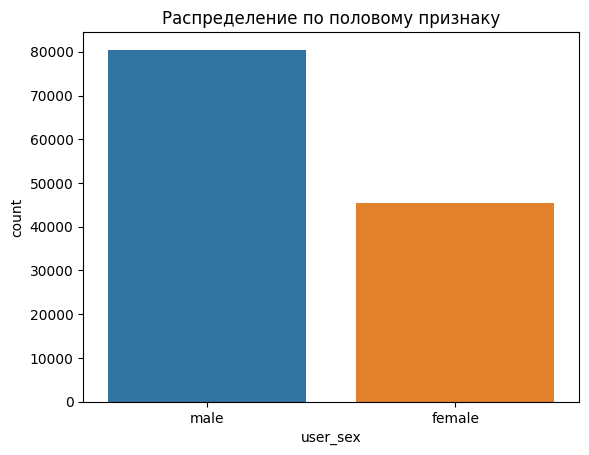

In [8]:
sns.countplot(x=df['user_sex'])
plt.title('Распределение по половому признаку')

В датасете мужчин почти в два раза больше, чем женщин. Если он состоит из жителей России, то такое соотношение странно, ведь в россии на одну женщину приходится 0.86 мужчин. 

Пока что опустим это недопонимание. Возможно, мужчины просто активнее пользуются соцсетью

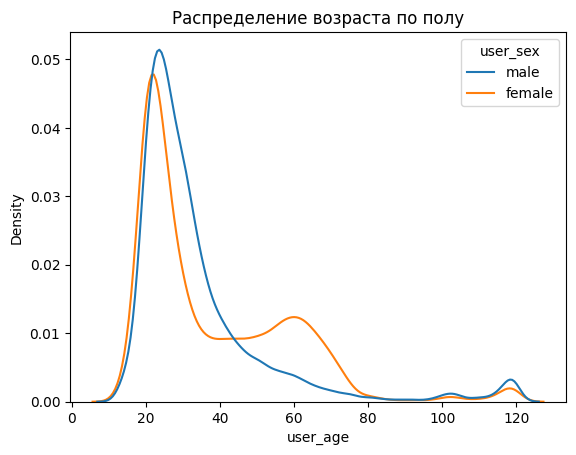

In [9]:
sns.kdeplot(data=df, x='user_age', hue='user_sex', common_norm=False)
plt.title('Распределение возраста по полу');

Из этого графика видно, что доля женщин в возрасте 40 + намного больше доли мужчин. Значит, выборка пользователей мужчин состоит из более юных представителей.

Наибольшую часть выборки составляют пользователи в возрасте от ~17 до ~40 лет.

In [10]:
df['user_age_group'] = pd.cut(df['user_age'], 
                              bins=[13, 17, 24, 34, 44, 54, 64, 200], 
                              labels=['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], 
                              include_lowest=True)

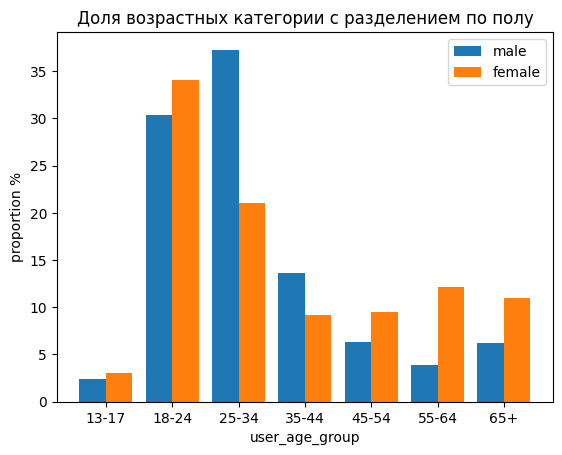

In [11]:
a = df.groupby('user_sex')['user_age_group'].value_counts(normalize=True).sort_index() * 100
x = np.arange(len(a['male']))
width = 0.4
plt.bar(x=x-width/2, height=a['male'], width=width, align='center', label='male')
plt.bar(x=x+width/2, height=a['female'], width=width, align='center', label='female')
plt.xticks(ticks=x, labels=a['male'].index)
plt.xlabel('user_age_group')
plt.ylabel('proportion %')
plt.title('Доля возрастных категории с разделением по полу')
plt.legend();

Распределим пользователей на возрастные группы начиная с возраста 13 лет - минимальный возраст для регистрации в VK.

Сверху представлен график долей возрастных категорий. Видно, что доля мужчин в возрасте от 18 до 34 больше доли женщина. В остальных возрастных категориях преобладает женская половина.

In [12]:
def plot_age_sex_bar(column, title):
    age_mean = df.groupby('user_age_group')[column].mean().sort_index(ascending=False)
    sex_mean = df.groupby('user_sex')[column].mean().sort_index(ascending=False)
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    axs[0].barh(y=age_mean.index, width=age_mean)
    axs[0].set_title('разделение по возрасту')
    axs[0].set_ylabel('возрастная категория')
    axs[0].set_xlabel('среднее значение')
    
    
    axs[1].bar(x=sex_mean.index, height=sex_mean)
    axs[1].set_title('разделение по полу')
    axs[1].set_xlabel('пол')
    axs[1].set_ylabel('среднее значение')
    
    
    
    fig.suptitle(title)
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.35)

### Социальные характеристики

Далее будет преставлен ряд графиков с разделением по полу и возрастной категории. На графиках изображены распределения выборочных средний определенной социальной характеристики пользователей, принадлежащих к группе разделения.

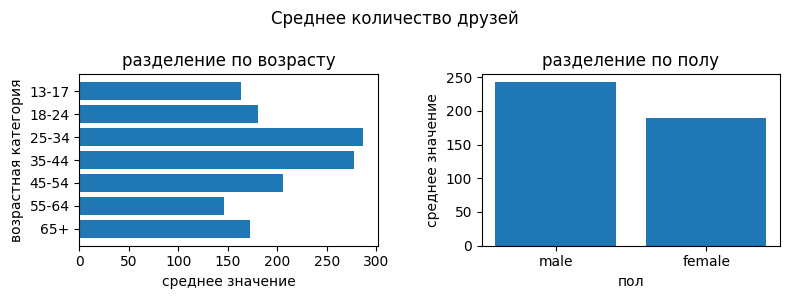

In [13]:
plot_age_sex_bar('user_friends', 'Среднее количество друзей')

Видно, что больше всего друзей имеют мужчины и пользователи в возрасте от 25 до 44 лет

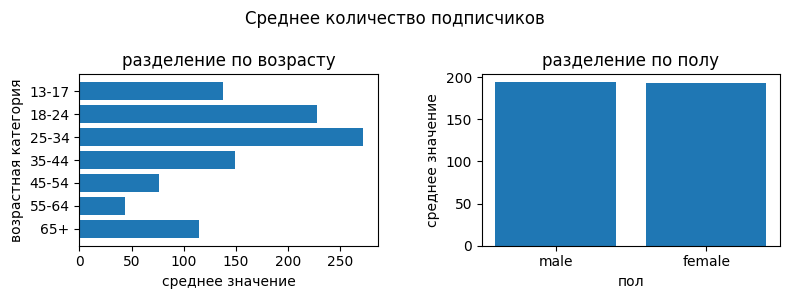

In [14]:
plot_age_sex_bar('user_fans_count', 'Среднее количество подписчиков')

Больше всего подписчиков получают пользователи от 25 до 34 лет. Меньше всего рассчитывать на наличие обильной "фанбазы" приходится старшему поколению от 55 до 64 лет. А пол, по всей видимости, не так важен.

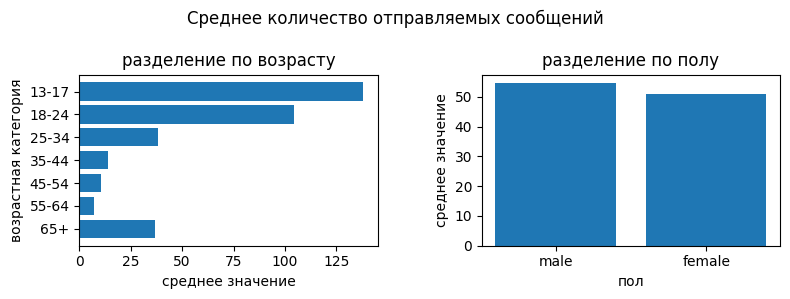

In [15]:
plot_age_sex_bar('messaging_total', 'Среднее количество отправляемых сообщений')

Самыми активными участниками переписок являются пользователи от 13 до 17 лет, а самыми пассивными - поколение от 55 до 64. Пол не особо играет роли.

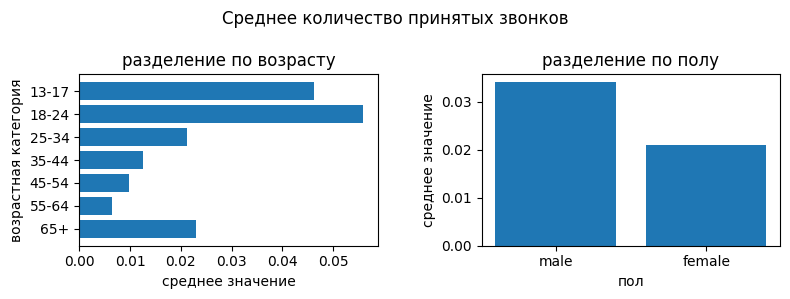

In [16]:
plot_age_sex_bar('calls_accepted', 'Среднее количество принятых звонков')

Больше остальный пользуются звонками 18-24 летняя группа пользователей и мужчины. 55-64 летние почти не пользуются. Наверное, звонят по вайберу :)

Но посмотрев на цену деления шкалы, можно увидеть, что звонки - очень непопулярный сервис...

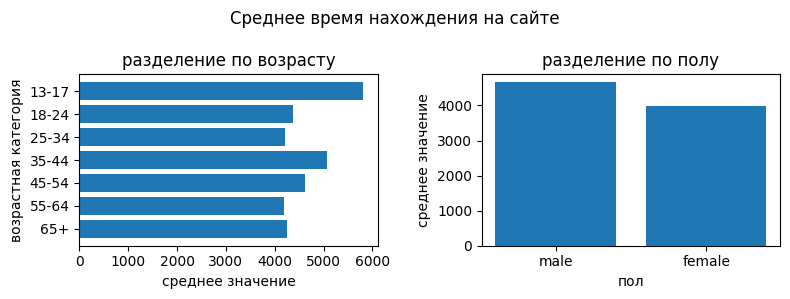

In [17]:
plot_age_sex_bar('timespent_total', 'Среднее время нахождения на сайте')

Дольше всех в соцсети сидят конечно же подростки. Было бы интересно посмотреть, как отличается это распределение в разные времена года. Может во время учебы их количество уменьшается, а может наоборот - сидят в контакте на скучных уроках

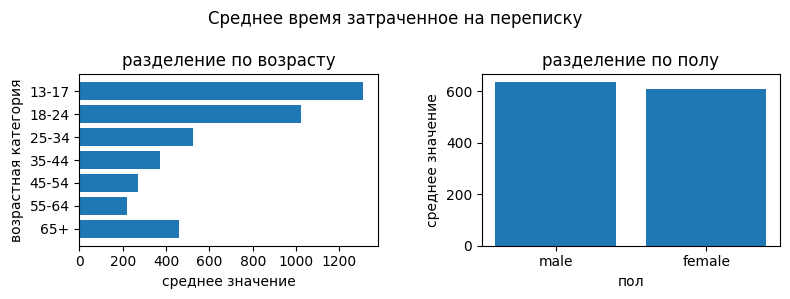

In [18]:
plot_age_sex_bar('timespent_im', 'Среднее время затраченное на переписку')

Опять же, именно подростки больше всех тратят времени на переписку. Меньше всех переписываются пользователи старшего поколения.

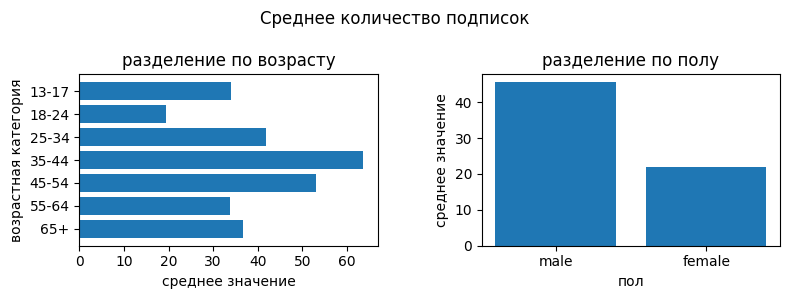

In [19]:
plot_age_sex_bar('user_subscriptions_count', 'Среднее количество подписок')

Мужчины сильно отрываются от женщин в этом показателе. Видимо, любят разнообразный контент. Так же любят разнообразить ленту по
льзователи от 35 до 54. А может быть просто забывают отписаться от ненужных пабликов

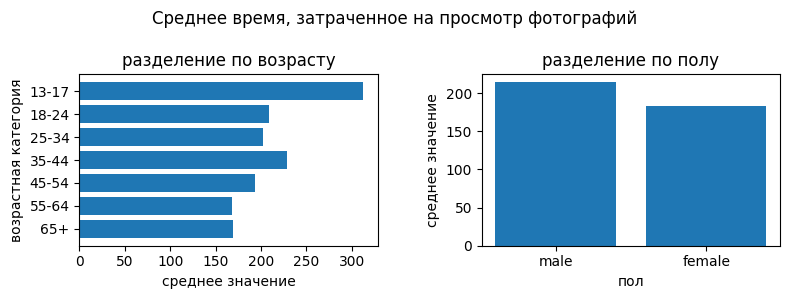

In [20]:
plot_age_sex_bar('timespent_photo', 'Среднее время, затраченное на просмотр фотографий')

Больше всех фотографии смотрят подростки. Как у них хватает времени на столько всего?

Остальные возрастные почти не отличаются друг от друго в данном показателе.

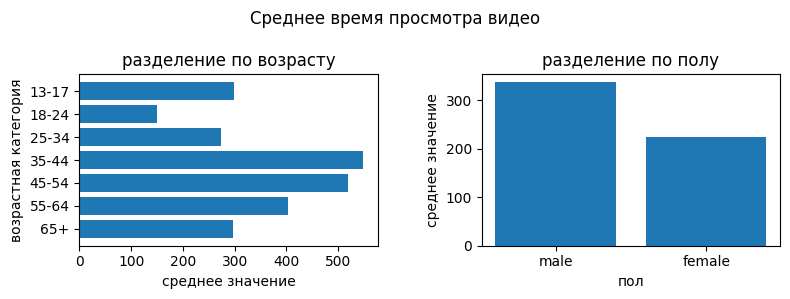

In [21]:
plot_age_sex_bar('timespent_video', 'Среднее время просмотра видео')

Больше всех видео смотрят люди от 35 до 54 лет. А вот молодежь, как ни странно, меньше всех. Скорее всего, они предпочитают контент с youtube или tiktok.

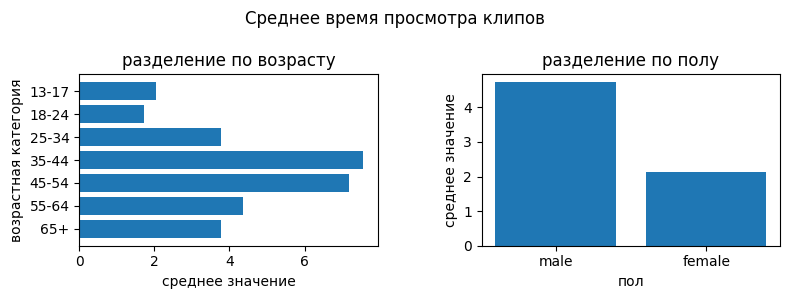

In [22]:
plot_age_sex_bar('timespent_clips', 'Среднее время просмотра клипов')

Мужчины и пользователи возраста от 35 до 54 лет вполне довольны аналогом tiktok в vk и смотрят клипы больше остальных. А вот подростки, видимо, предпочитают оригинал.

## Группы пользователей

Пользователей для любого анализа необходимо делить на группы. В рамках данного исследования, я выделил 3 вида групп, разделенных по разным признакам. 

Конечно, при более глубоком и детальном анализе, при наличии большего количества данных можно выделить еще несколько групп.

### Коммуникативные группы

Эти группы определяются двумя признаками - *количеством друзей* и *количеством отправленных сообщений*

Идея такова, что чем больше у человека друзей - тем больше он должен отправлять сообщений, чтобы не забыть каждого друга. Но не все так просто в интернете, давайте разбираться:

- Если у человека много друзей, но пишет он мало - скорее всего друзей он либо подкрутил, либо он является публичной личностью.
- Если друзей много и пишет он много - возможно, что это бот, аккаунт компании (или сверх человек, способный общаться с несколькими тысячами друзей)
- Если друзей мало, а пишет много - возможно, он спамер и пишет незнакомцам, либо очень активно общается внутри малого круга друзей
- Если друзей мало и пишет мало - возможно, что он сталкер, который сидит с фейка или "мертвый" пользователь
- Во всех остальных случаях - это среднестатистический пользователь

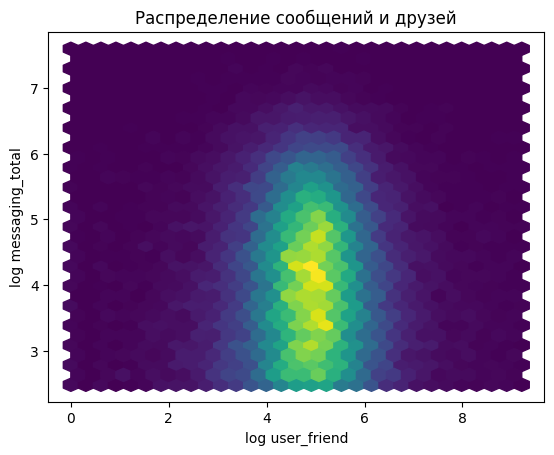

In [23]:
mask = (df['messaging_total'] < 2000) & (df['messaging_total'] > 10)
plt.hexbin(x=np.log(df[mask]['user_friends'] + 1), 
           y=np.log(df[mask]['messaging_total']+1), gridsize=30)
plt.xlabel('log user_friend')
plt.ylabel('log messaging_total')
plt.title('Распределение сообщений и друзей');

### Группы популярности

Эти группы определяются двумя признаками - *количеством друзей* и *количеством подписчиков*

Подписчики и друзья могут являться мерилом популярности человека. По идее, чем их больше - тем популярнее пользователь. Этот способ группирования немного наивен, ведь некоторые люди просто добавляют в друзья всех подряд, но имеет место быть. Итак,

- Если у пользователя много друзей и мало подписчиков, можно выдвинуть несколько гипотез - он накрутчик или средне известная личность. Это может быть какой-то блоггер, известный в узких кругах, с недостаточно большой фанбазой, чтобы людям, которые стучатся к нему в друзья, не хватило места в друзьях (10000 человек).
- Если у пользователя много друзей и много подписчиков это может быть либо накрутчик, либо довольно известная личность.
- Остальные случаи можно назвать среднестатистическими

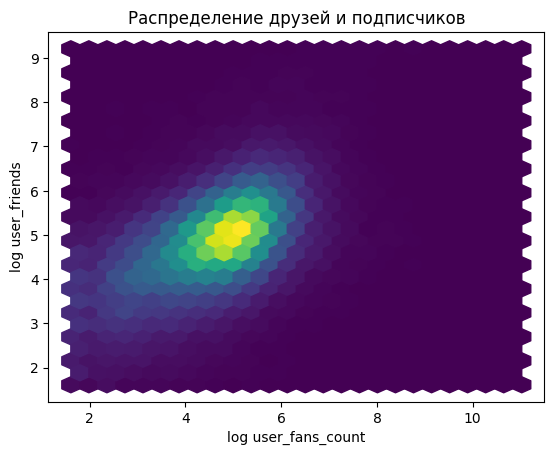

In [24]:
mask = (df['user_fans_count'] > 3) & (df['user_friends'] > 3)
plt.hexbin(x=np.log(df[mask]['user_fans_count'] + 1), 
           y=np.log(df[mask]['user_friends'] + 1), gridsize=25)
plt.xlabel('log user_fans_count')
plt.ylabel('log user_friends')
plt.title('Распределение друзей и подписчиков');

### Визуалы / аудиалы

Здесь все довольно просто. Чем больше времени пользователь тратит на музыку - тем больше он аудиал. То же самое касается видео: если смотрит много, то он визуал.

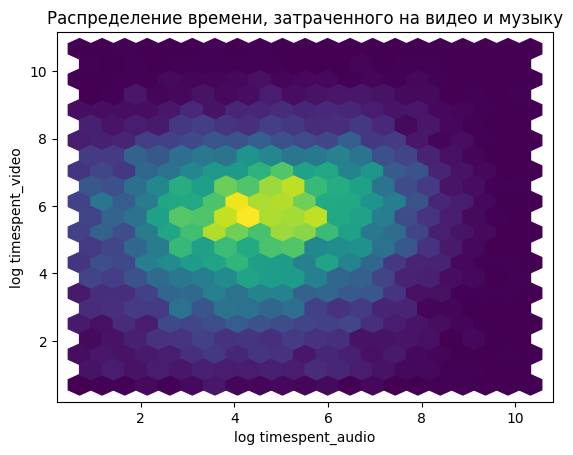

In [25]:
mask = (df['timespent_audio'] > 0) & (df['timespent_video'] > 0)

plt.hexbin(x=np.log(df[mask]['timespent_audio'] + 1), y=np.log(df[mask]['timespent_video'] + 1), gridsize=20)
plt.xlabel('log timespent_audio')
plt.ylabel('log timespent_video')
plt.title('Распределение времени, затраченного на видео и музыку');